<a href="https://colab.research.google.com/github/A00829752/TC3006C/blob/main/ClasificacionFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Datos
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
print(data.shape)

(303, 14)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

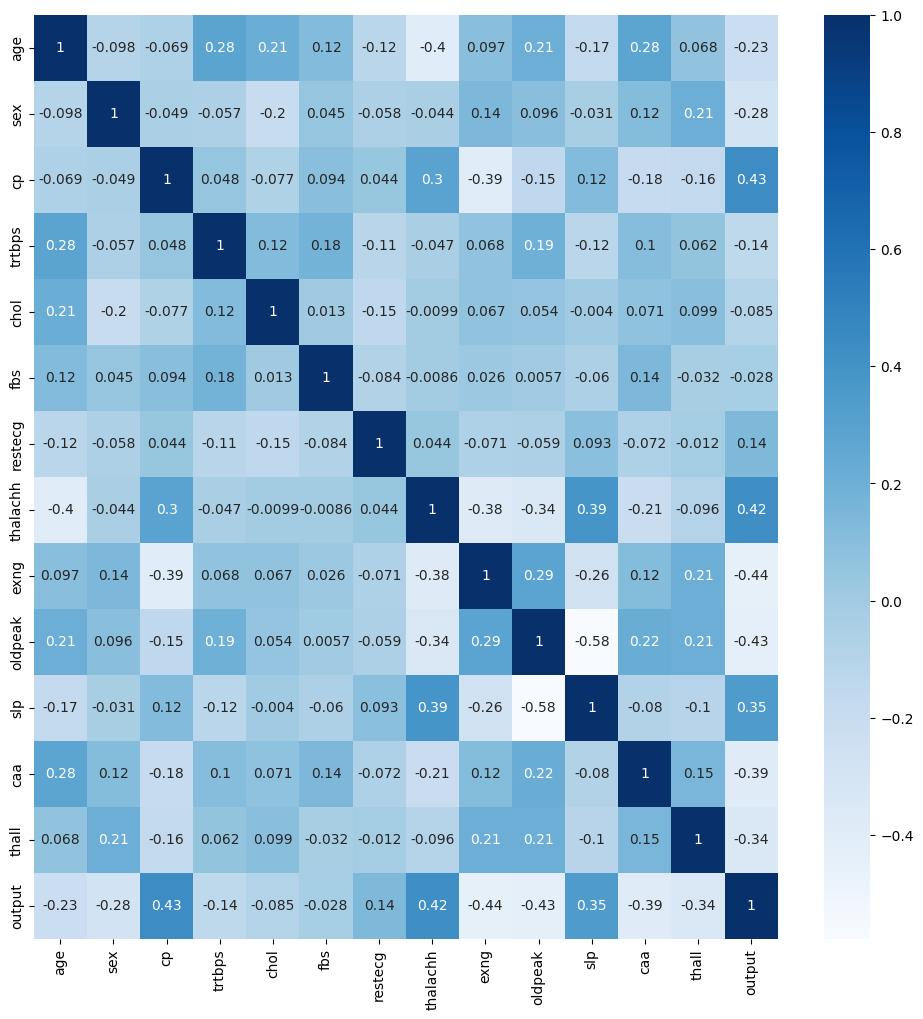

In [9]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(corr, cmap = 'Blues', annot = True)

In [10]:
#Librería Separar dataset
from sklearn.model_selection import train_test_split

#Librerías para Modelos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


#Se usa en la función que no hemos usado todavía en el proyecto
from sklearn.model_selection import cross_val_score
#Librerías para realizar un análisis de la implementación del modelo
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [13]:
#Separamos tipos de variables en dependientes e independientes
features = data.drop(['output'], axis = 1)
X = features # variables predictoras
y = data['output']    # variable de respuesta
#Se divide el dataset en entrenamiento y test, con un ratio de 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier()))

In [29]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.590164
1  SVC  0.655738
2   LR  0.803279
3   DT  0.737705
4  GNB  0.819672
5   RF  0.803279
6   GB  0.819672
7  MLP  0.836066


Accuracy: 0.819672131147541
Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1: 0.8450704225352113


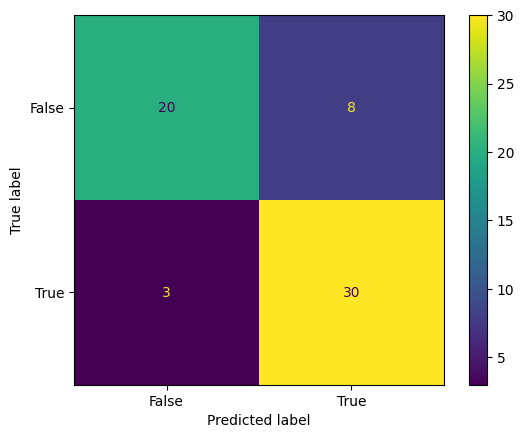

In [76]:
GNB = GaussianNB()
#Se ajustan los datos al modelo
GNB.fit(X_train, y_train)

#Se predice el modelo
y_pred = GNB.predict(X_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#Se imprimen las variables obtenidas de la matríz
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision:",	metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.819672131147541
Precision: 0.775
Recall: 0.9393939393939394
F1: 0.8493150684931509


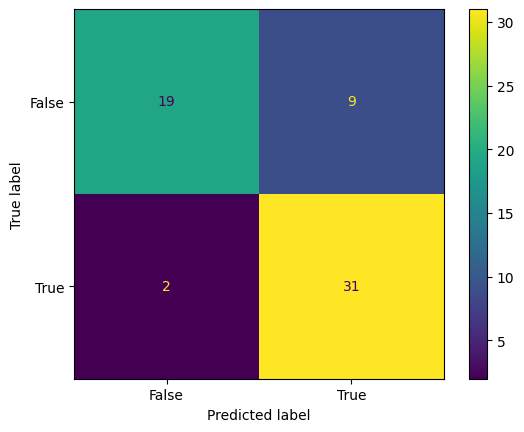

In [78]:
RF = RandomForestClassifier()
#Se ajustan los datos al modelo
RF.fit(X_train, y_train)

#Se predice el modelo
y_pred = RF.predict(X_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#Se imprimen las variables obtenidas de la matríz
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision:",	metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.819672131147541
Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1: 0.8450704225352113


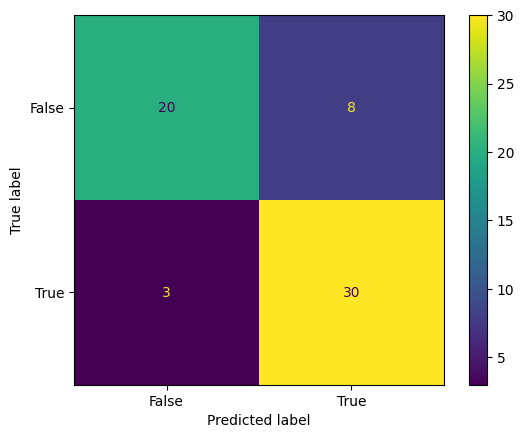

In [79]:
GB = GradientBoostingClassifier()
#Se ajustan los datos al modelo
GB.fit(X_train, y_train)

#Se predice el modelo
y_pred = GB.predict(X_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#Se imprimen las variables obtenidas de la matríz
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision:",	metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Accuracy: 0.8524590163934426
Precision: 0.7857142857142857
Recall: 1.0
F1: 0.88


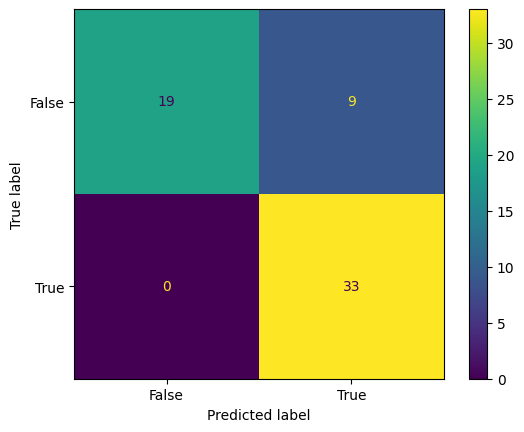

In [84]:
GB = GradientBoostingClassifier(learning_rate=0.01, max_depth=4)
#Se ajustan los datos al modelo
GB.fit(X_train, y_train)

#Se predice el modelo
y_pred = GB.predict(X_test)
#Matríz de confusión
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#Se imprimen las variables obtenidas de la matríz
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Precision:",	metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1:',metrics.f1_score(y_test, y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()